# Outline

Create a synthetic three-class dataset and see how various classifiers including SVM classify the data.

In [1]:
import numpy as np

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [26]:
# Centering Plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<br><br><br>

# Create Dataset

In [3]:
num_cls_samples = 500
cluster_dist = 3.0

labels = np.concatenate([
    np.repeat(0, num_cls_samples), 
    np.repeat(1, num_cls_samples),
    np.repeat(2, num_cls_samples)], axis=0)

base_dataset = np.random.randn(num_cls_samples, 2)
features = np.concatenate([
    base_dataset + np.array([[0.0, 0.866 * cluster_dist]]),
    base_dataset + np.array([[-0.5 * cluster_dist, 0.0]]),
    base_dataset + np.array([[ 0.5 * cluster_dist, 0.0]]),
], axis=0)

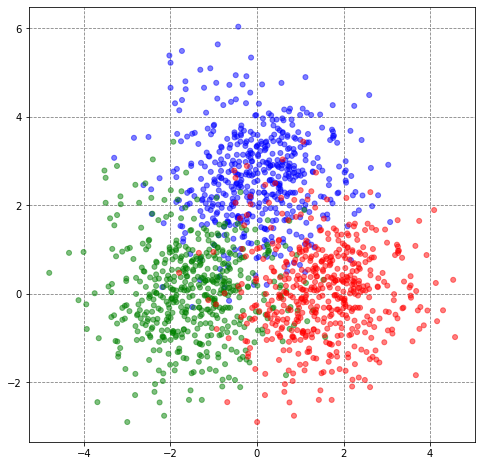

In [4]:
fig = plt.figure(figsize=(8.0, 8.0))
colors = np.where(labels == 0, "blue", np.where(labels == 1, "green", "red"))
plt.scatter(features[:, 0], features[:, 1], s=25.0, c=colors, alpha=0.5)
plt.grid(ls="--", color="gray")
plt.gca().set_axisbelow(True)
plt.show()

<br><br><br>

# Classifiers

## Linear SVM

In [5]:
classifier = svm.SVC(
    C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, 
    shrinking=True, probability=False, tol=0.001, cache_size=200, 
    class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', 
    break_ties=False, random_state=None)

classifier.fit(features, labels)

SVC(kernel='linear')

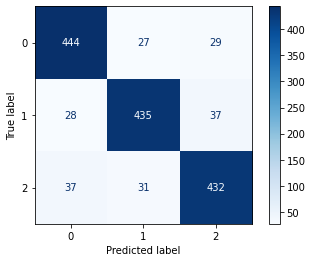

In [6]:
plot_confusion_matrix(
    classifier, features, labels, normalize=None, 
    display_labels=["0", "1", "2"], cmap="Blues")

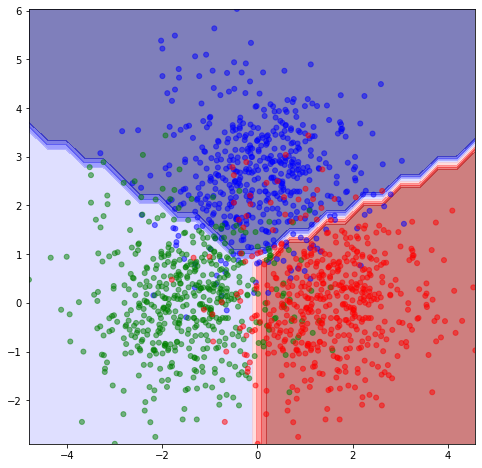

In [7]:
grid_res = 25

x_min, y_min = np.amin(features, axis=0)
x_max, y_max = np.amax(features, axis=0)

xx, yy = np.meshgrid(
    np.linspace(start=x_min, stop=x_max, num=grid_res, endpoint=True),
    np.linspace(start=y_min, stop=y_max, num=grid_res, endpoint=True)
)

y = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y = y.reshape(xx.shape)

fig = plt.figure(figsize=(8.0, 8.0))
plt.contourf(xx, yy, y, levels=None, cmap="seismic", alpha=0.5)
plt.scatter(features[:, 0], features[:, 1], s=25.0, c=colors, alpha=0.5)
plt.show()

## Polynomial SVM

In [8]:
classifier = svm.SVC(
    C=1.0, kernel='poly', degree=3, gamma='scale', coef0=0.0, 
    shrinking=True, probability=False, tol=0.001, cache_size=200, 
    class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', 
    break_ties=False, random_state=None)

classifier.fit(features, labels)

SVC(kernel='poly')

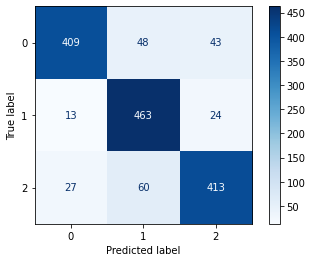

In [9]:
plot_confusion_matrix(
    classifier, features, labels, normalize=None, 
    display_labels=["0", "1", "2"], cmap="Blues")

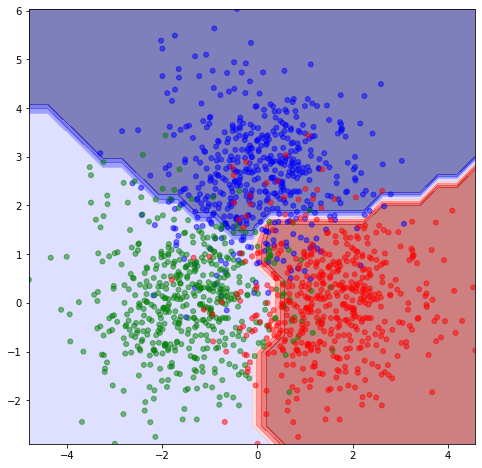

In [10]:
grid_res = 25

x_min, y_min = np.amin(features, axis=0)
x_max, y_max = np.amax(features, axis=0)

xx, yy = np.meshgrid(
    np.linspace(start=x_min, stop=x_max, num=grid_res, endpoint=True),
    np.linspace(start=y_min, stop=y_max, num=grid_res, endpoint=True)
)

y = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y = y.reshape(xx.shape)

fig = plt.figure(figsize=(8.0, 8.0))
plt.contourf(xx, yy, y, levels=None, cmap="seismic", alpha=0.5)
plt.scatter(features[:, 0], features[:, 1], s=25.0, c=colors, alpha=0.5)
plt.show()

## Random Forest Regression

In [11]:
classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='gini', 
    max_depth=6, 
    min_samples_split=5, 
    min_samples_leaf=3, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

classifier.fit(features, labels)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5)

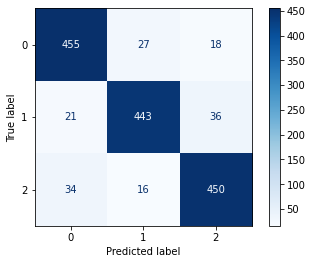

In [12]:
plot_confusion_matrix(
    classifier, features, labels, normalize=None, 
    display_labels=["0", "1", "2"], cmap="Blues")

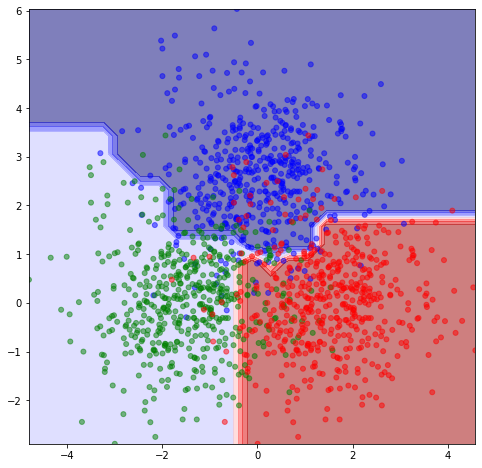

In [13]:
grid_res = 25

x_min, y_min = np.amin(features, axis=0)
x_max, y_max = np.amax(features, axis=0)

xx, yy = np.meshgrid(
    np.linspace(start=x_min, stop=x_max, num=grid_res, endpoint=True),
    np.linspace(start=y_min, stop=y_max, num=grid_res, endpoint=True)
)

y = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y = y.reshape(xx.shape)

fig = plt.figure(figsize=(8.0, 8.0))
plt.contourf(xx, yy, y, levels=None, cmap="seismic", alpha=0.5)
plt.scatter(features[:, 0], features[:, 1], s=25.0, c=colors, alpha=0.5)
plt.show()

## KNN Classifier:

In [14]:
classifier = KNeighborsClassifier(
    n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, 
    p=2, metric='minkowski', metric_params=None, n_jobs=None)

classifier.fit(features, labels)

KNeighborsClassifier()

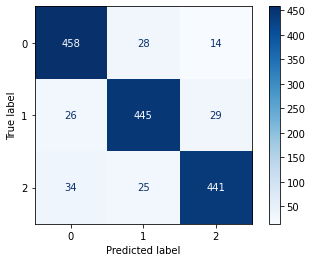

In [15]:
plot_confusion_matrix(
    classifier, features, labels, normalize=None, 
    display_labels=["0", "1", "2"], cmap="Blues")

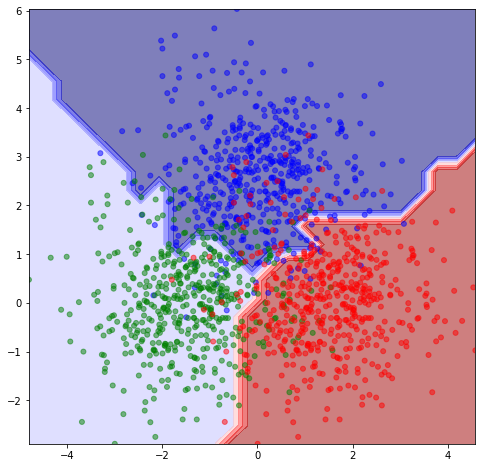

In [16]:
grid_res = 25

x_min, y_min = np.amin(features, axis=0)
x_max, y_max = np.amax(features, axis=0)

xx, yy = np.meshgrid(
    np.linspace(start=x_min, stop=x_max, num=grid_res, endpoint=True),
    np.linspace(start=y_min, stop=y_max, num=grid_res, endpoint=True)
)

y = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y = y.reshape(xx.shape)

fig = plt.figure(figsize=(8.0, 8.0))
plt.contourf(xx, yy, y, levels=None, cmap="seismic", alpha=0.5)
plt.scatter(features[:, 0], features[:, 1], s=25.0, c=colors, alpha=0.5)
plt.show()

## Decision Tree Classifier:

In [17]:
dt_classifiers = {}
for max_depth in [1, 2, 4, 8]:
    dt_classifiers[max_depth] = DecisionTreeClassifier(
        criterion='gini', splitter='best', max_depth=max_depth, min_samples_split=2, 
        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
        random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
        min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

    _ = dt_classifiers[max_depth].fit(features, labels)

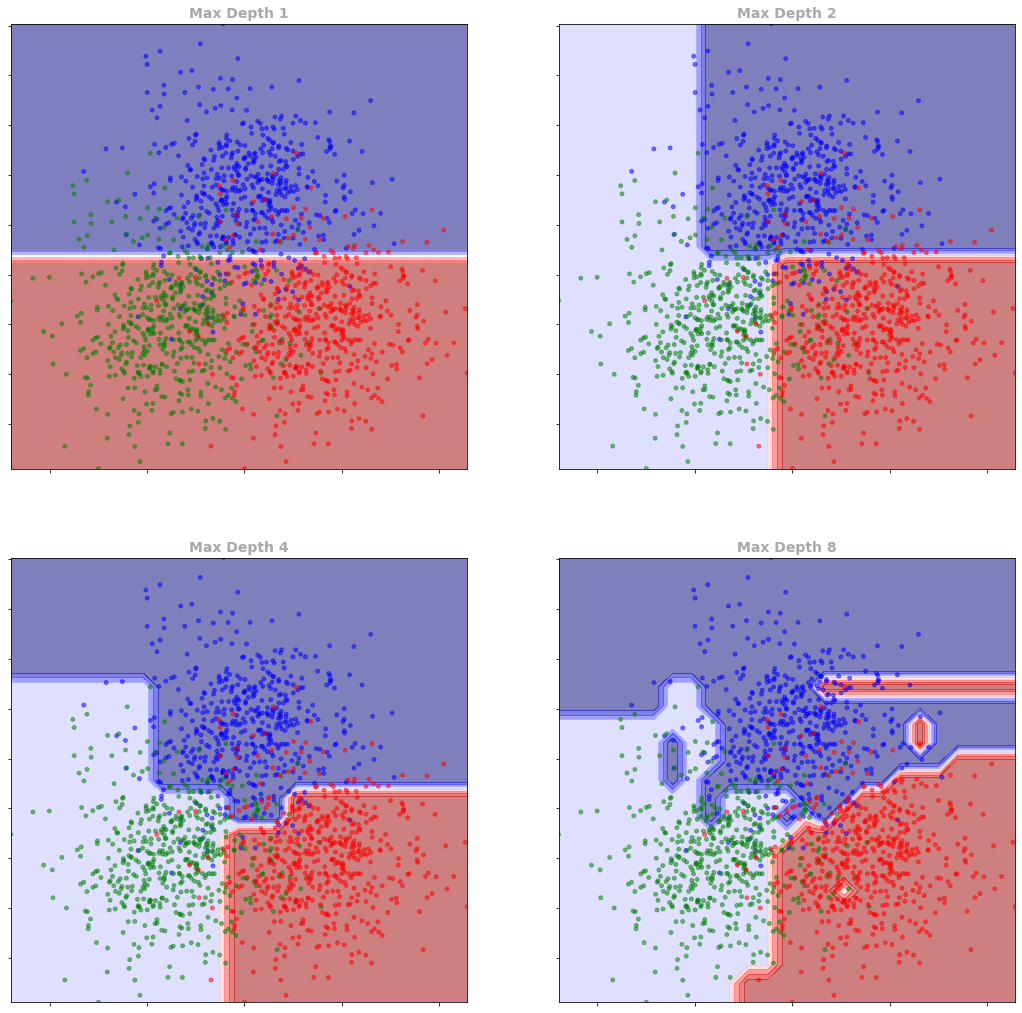

In [18]:
grid_res = 25

x_min, y_min = np.amin(features, axis=0)
x_max, y_max = np.amax(features, axis=0)
xx, yy = np.meshgrid(
    np.linspace(start=x_min, stop=x_max, num=grid_res, endpoint=True),
    np.linspace(start=y_min, stop=y_max, num=grid_res, endpoint=True))

fig = plt.figure(figsize=(18.0, 18.0))
for n, max_depth in enumerate(dt_classifiers.keys(), start=1):
    y = dt_classifiers[max_depth].predict(np.c_[xx.ravel(), yy.ravel()])
    y = y.reshape(xx.shape)
    #
    ax = plt.subplot(2, 2, n)
    ax.set_title(f"Max Depth {max_depth}", fontsize=14, fontweight="bold", color="darkgray")
    ax.contourf(xx, yy, y, levels=None, cmap="seismic", alpha=0.5)
    ax.scatter(features[:, 0], features[:, 1], s=15.0, c=colors, alpha=0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()

## AdaBoost:

In [19]:
classifier = AdaBoostClassifier(
    base_estimator=None, 
    n_estimators=100, 
    learning_rate=0.8, 
    algorithm='SAMME.R', 
    random_state=None)

classifier.fit(features, labels)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100)

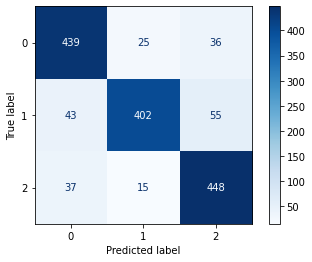

In [20]:
plot_confusion_matrix(
    classifier, features, labels, normalize=None, 
    display_labels=["0", "1", "2"], cmap="Blues")

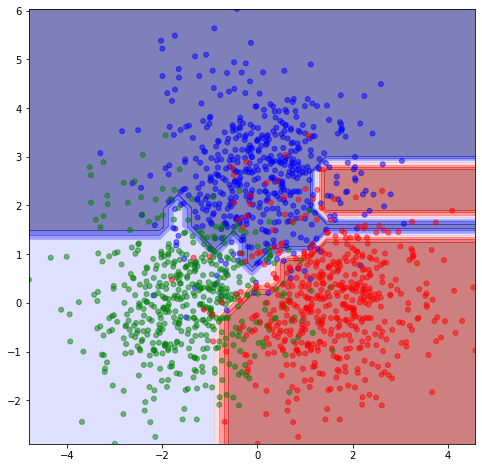

In [21]:
grid_res = 25

x_min, y_min = np.amin(features, axis=0)
x_max, y_max = np.amax(features, axis=0)

xx, yy = np.meshgrid(
    np.linspace(start=x_min, stop=x_max, num=grid_res, endpoint=True),
    np.linspace(start=y_min, stop=y_max, num=grid_res, endpoint=True)
)

y = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y = y.reshape(xx.shape)

fig = plt.figure(figsize=(8.0, 8.0))
plt.contourf(xx, yy, y, levels=None, cmap="seismic", alpha=0.5)
plt.scatter(features[:, 0], features[:, 1], s=25.0, c=colors, alpha=0.5)
plt.show()

## Gradient Boosting:

In [22]:
classifier = GradientBoostingClassifier(
    loss='deviance', 
    learning_rate=0.1, 
    n_estimators=50, 
    subsample=0.8, 
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_depth=3, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    init=None, random_state=None, 
    max_features=None, verbose=0, 
    max_leaf_nodes=None, 
    warm_start=False, 
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001, 
    ccp_alpha=0.0)

classifier.fit(features, labels)

GradientBoostingClassifier(n_estimators=50, subsample=0.8)

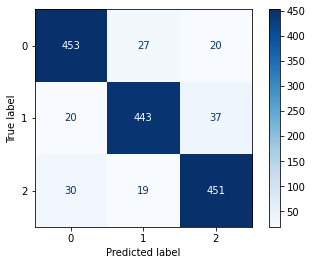

In [23]:
plot_confusion_matrix(
    classifier, features, labels, normalize=None, 
    display_labels=["0", "1", "2"], cmap="Blues")

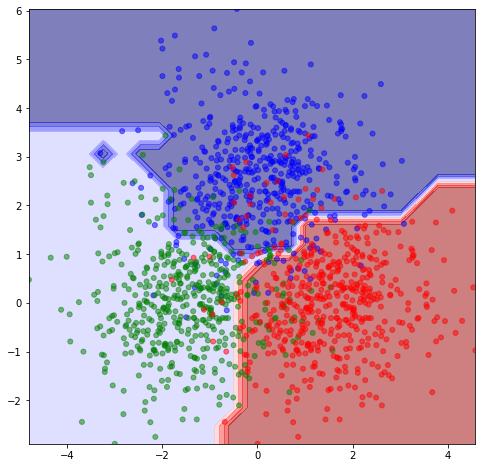

In [24]:
grid_res = 25

x_min, y_min = np.amin(features, axis=0)
x_max, y_max = np.amax(features, axis=0)

xx, yy = np.meshgrid(
    np.linspace(start=x_min, stop=x_max, num=grid_res, endpoint=True),
    np.linspace(start=y_min, stop=y_max, num=grid_res, endpoint=True)
)

y = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
y = y.reshape(xx.shape)

fig = plt.figure(figsize=(8.0, 8.0))
plt.contourf(xx, yy, y, levels=None, cmap="seismic", alpha=0.5)
plt.scatter(features[:, 0], features[:, 1], s=25.0, c=colors, alpha=0.5)
plt.show()